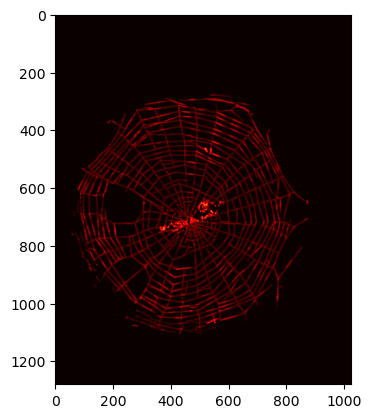

In [2]:
import os, matplotlib.pyplot as plt, scipy
import cv2
import skimage.draw, numpy as np
import pandas as pd
directory = 'data/'
auc = np.load(directory+'050925_preyM1_C001H001S0001_270-300hz_auc.npz')
auc=auc['AUC']
fig = plt.figure()
plt.imshow(auc[:,:,0], vmax = 10000, cmap='hot')

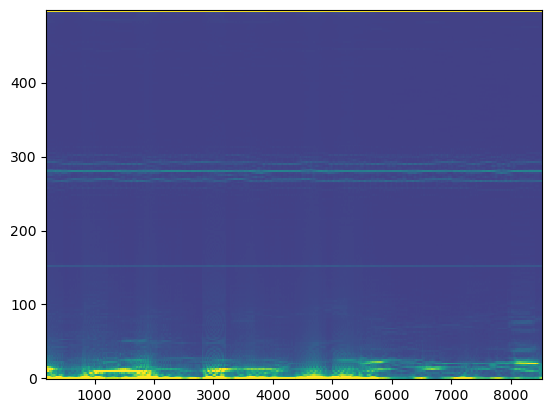

In [3]:
stft = np.load(directory+'050925_preyM1_C001H001S0001_stft_window400_shift20.npz')
f_spec = stft['f_spec']
ff=stft['ff']
window=400
step=20
nframe = 8734
t = [i for i in range(int(window/2), (nframe - int(window/2)), step)]
t=np.array(t)
f_idx = np.where((ff >= 0) & (ff <= 500))
fig = plt.figure()
ax2 = plt.subplot()
ax2.pcolormesh(t, ff[f_idx], f_spec[f_idx], vmin=0, vmax=100)
# ax2.pcolormesh(t, ff[f_idx], f_spec[f_idx])

plt.show()

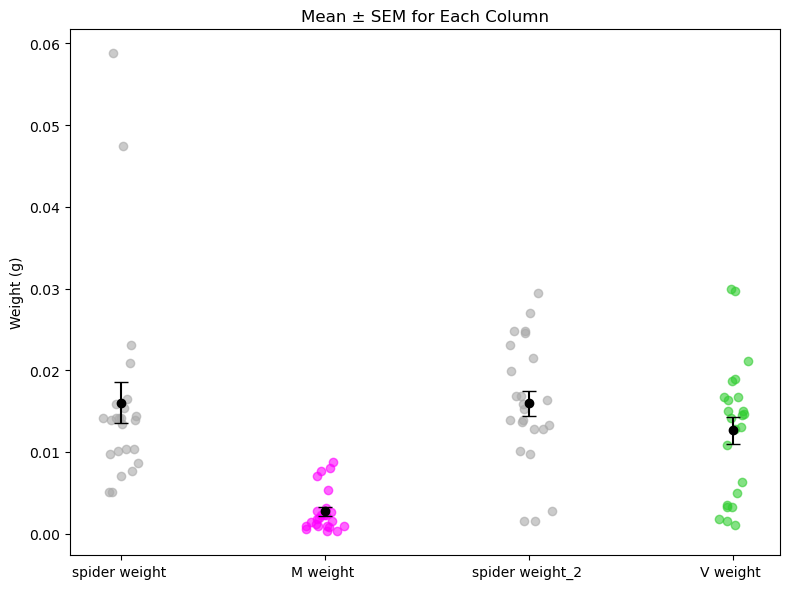

Mann–Whitney U statistic = 510.500, p-value = 0.0000


In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jun  4 10:54:32 2025

@author: hsinyihung
"""

import os, glob
import imageio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

control_name = 'D.Melano_weight_webvibration.csv'

directory = 'data/'
df = pd.read_csv(directory + control_name, header=0)

# Calculate mean and SEM
means = df.mean()
sems = df.sem()  # pandas has a built-in method for SEM!

# Create scatter plot with error bars (SEM)
plt.figure(figsize=(8, 6))
x = np.arange(len(df.columns))
plt.errorbar(x, means, yerr=sems, fmt='o', capsize=5, linestyle='None', color='black', ecolor='black')

# Plot individual data points with jitter
for i, col in enumerate(df.columns):
    jitter = np.random.normal(0, 0.05, size=len(df[col]))  # small horizontal jitter
    if col == 'V weight ':
        plt.scatter(np.full_like(df[col], x[i]) + jitter, df[col], alpha=0.6, label=f'{col} data' if i == 0 else "",
                    color='limegreen')
    elif col == 'M weight ':
        plt.scatter(np.full_like(df[col], x[i]) + jitter, df[col], alpha=0.6, label=f'{col} data' if i == 0 else "",
                    color='magenta')
    else:
        plt.scatter(np.full_like(df[col], x[i]) + jitter, df[col], alpha=0.6, label=f'{col} data' if i == 0 else "",
                    color='darkgrey')

# Customize plot
plt.xticks(x, df.columns)
plt.ylabel('Weight (g)')
plt.title('Mean ± SEM for Each Column')

plt.tight_layout()
plt.show()
from scipy.stats import mannwhitneyu

# Compare column 'A' and 'B'
stat, p = mannwhitneyu(df['V weight '], df['M weight '], alternative='two-sided')

print(f'Mann–Whitney U statistic = {stat:.3f}, p-value = {p:.4f}')


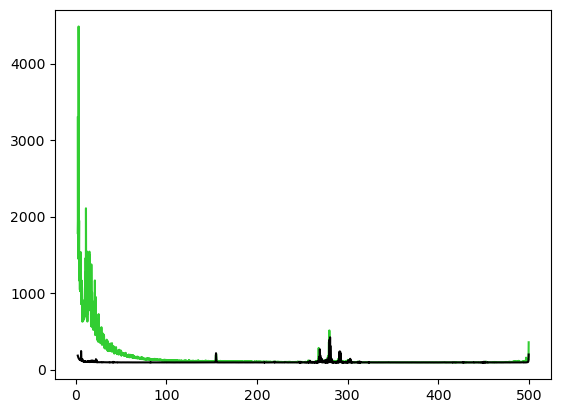

In [10]:
import os, matplotlib.pyplot as plt, scipy
import cv2
import skimage.draw, numpy as np
import pandas as pd



fft_name = '042425_prey2_C001H001S0001_fft.npz'
control_name = '042425_control_air2_C001H001S0001_fft.npz'
directory = 'data/'
fname = directory+fft_name

fft = np.load(fname)
fft_control = np.load(directory+control_name)



ff = fft['ff']
fft=fft['dataFFT']
fft_control = fft_control['dataFFT']
plt.figure()
plt.plot(ff[ff > 2], np.mean(fft, axis=0)[ff > 2], c='limegreen')
plt.plot(ff[ff > 2], np.mean(fft_control, axis=0)[ff > 2], c='black')
plt.show()



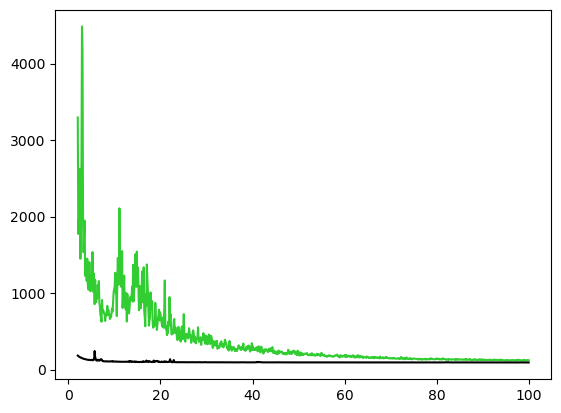

In [11]:

plt.figure()
plt.plot(ff[(ff > 2) & (ff < 100)], np.mean(fft, axis=0)[(ff > 2) & (ff < 100)], c='limegreen')
plt.plot(ff[(ff > 2) & (ff < 100)], np.mean(fft_control, axis=0)[(ff > 2) & (ff < 100)], c='black')
plt.show()



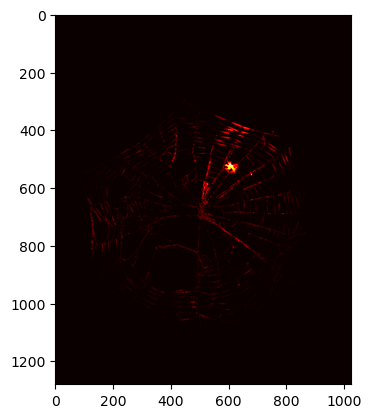

In [12]:
auc = np.load(directory+'042425_prey2_C001H001S0001_5-30hz_auc.npz')
auc=auc['AUC']
fig = plt.figure()
plt.imshow(auc[:,:,0], vmax =200000, cmap='hot')

<Figure size 640x480 with 0 Axes>

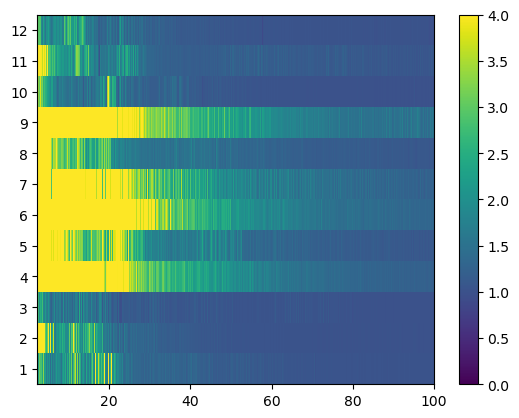

In [26]:
import os, glob
import imageio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

control_name = 'FFT_table_control_v.csv'
fft_name = 'FFT_table_prey_v.csv'
directory = 'data/'
fname = directory+fft_name

df_control = pd.read_csv(directory+control_name, index_col=[0])
df_fft = pd.read_csv(directory+fft_name, index_col=[0])



### 0-50 HZ

df_control = df_control.drop(columns=['fname'])
##drop f <2.5 Hz
df_control = df_control.drop(df_control.columns[0:20], axis =1)


df_fft = df_fft.drop(columns=['fname'])
df_fft = df_fft.drop(df_fft.columns[0:20], axis =1)


ff = np.array(df_fft.columns[0:len(df_fft.columns)], dtype = float)

index = np.array(range(0,len(df_fft)), dtype = float)
df2 = df_fft.div(df_control, axis=0)

plt.style.use('default')
plt.figure()
fig,ax = plt.subplots()
im = ax.pcolormesh(ff, index, df2, vmin = 0, vmax = 4)
fig.colorbar(im)
ax.set_yticks(np.arange(0,len(index)))
ax.set_yticklabels(np.arange(1,len(index)+1))
plt.show()

In [27]:
mean_prey_v = df2.mean(axis=0)
sem_prey_v = df2.sem(axis=0)

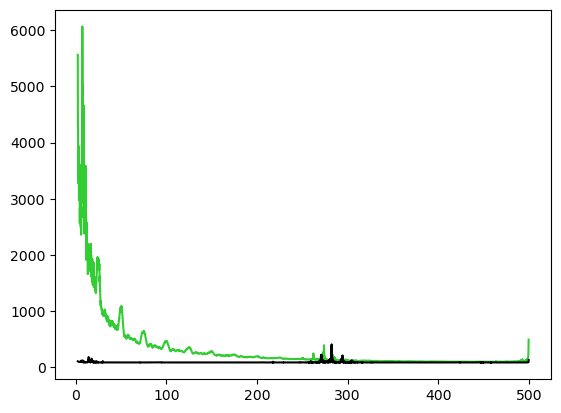

In [18]:

fft_name = '050925_spider_preyl1_C001H001S0001_nohand_fft.npz'
control_name = '050925_spider_control1_C001H001S0001_fft.npz'
directory = 'data/'
fname = directory+fft_name

fft = np.load(fname)
fft_control = np.load(directory+control_name)



ff = fft['ff']
fft=fft['dataFFT']
ff_control = fft_control['ff']
fft_control = fft_control['dataFFT']

plt.figure()
plt.plot(ff[ff > 2], np.mean(fft, axis=0)[ff > 2], c='limegreen')
plt.plot(ff_control[ff_control > 2], np.mean(fft_control, axis=0)[ff_control > 2], c='black')
plt.show()


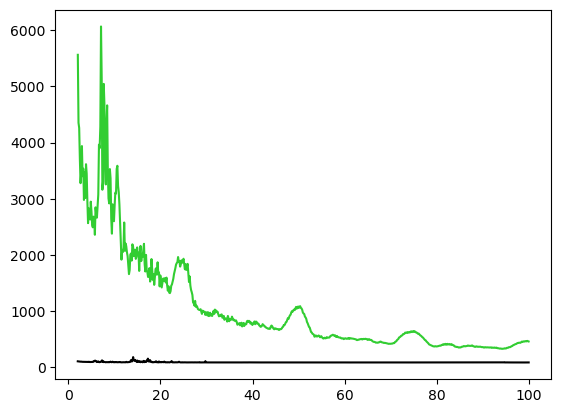

In [19]:

plt.figure()
plt.plot(ff[(ff > 2) & (ff < 100)], np.mean(fft, axis=0)[(ff > 2) & (ff < 100)], c='limegreen')
plt.plot(ff_control[(ff_control > 2) & (ff_control < 100)], np.mean(fft_control, axis=0)[(ff_control > 2) & (ff_control < 100)], c='black')
plt.show()

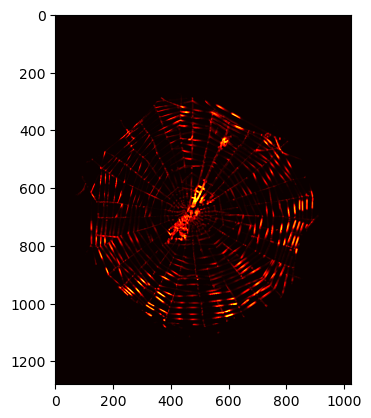

In [22]:
auc = np.load(directory+'050925_spider_preyl1_C001H001S0001_nohand_5-20hz_auc.npz')
auc=auc['AUC']
fig = plt.figure()
plt.imshow(auc[:,:,20], vmax = 175000, cmap='hot')

<Figure size 640x480 with 0 Axes>

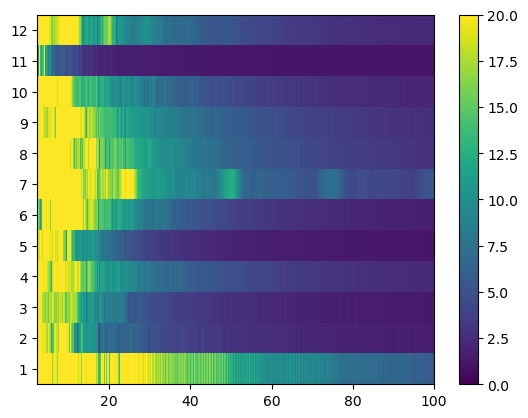

In [23]:
import os, glob
import imageio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

control_name = 'FFT_table_spider_control_v.csv'
fft_name = 'FFT_table_spider_prey_v.csv'
directory = 'data/'
fname = directory+fft_name

df_control = pd.read_csv(directory+control_name, index_col=[0])
df_fft = pd.read_csv(directory+fft_name, index_col=[0])



### 0-50 HZ

df_control = df_control.drop(columns=['fname'])
##drop f <2.5 Hz
df_control = df_control.drop(df_control.columns[0:20], axis =1)


df_fft = df_fft.drop(columns=['fname'])
df_fft = df_fft.drop(df_fft.columns[0:20], axis =1)


ff = np.array(df_fft.columns[0:len(df_fft.columns)], dtype = float)

index = np.array(range(0,len(df_fft)), dtype = float)
df2 = df_fft.div(df_control, axis=0)

plt.style.use('default')
plt.figure()
fig,ax = plt.subplots()
im = ax.pcolormesh(ff, index, df2, vmin = 0, vmax = 20)
fig.colorbar(im)
ax.set_yticks(np.arange(0,len(index)))
ax.set_yticklabels(np.arange(1,len(index)+1))
plt.show()

In [25]:
mean_spider_prey_v = df2.mean(axis=0)
sem_spider_prey_v = df2.sem(axis=0)


In [28]:


import os, glob
import imageio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

control_name = 'FFT_table_spider_control.csv'
fft_name = 'FFT_table_spider_prey.csv'
directory = 'data/'
fname = directory+fft_name

df_control = pd.read_csv(directory+control_name, index_col=[0])
df_fft = pd.read_csv(directory+fft_name, index_col=[0])



### 0-50 HZ
f80_100 = df_control.iloc[:, 699:875]
#f80_100 = df_control.iloc[:, 1:2]
#mean_power = f80_100.mean(axis =1)
#df_control = df_control.drop(df_control.columns[437:875], axis =1)
df_control = df_control.drop(columns=['fname'])
df_control = df_control.drop(df_control.columns[0:20], axis =1)
#df_control= df_control.div(mean_power, axis=0)

f80_100 = df_fft.iloc[:, 699:875]
#f80_100 = df_fft.iloc[:, 1:2]
#mean_power = f80_100.mean(axis =1)
#df_fft = df_fft.drop(df_fft.columns[437:875], axis =1)
df_fft = df_fft.drop(columns=['fname'])
df_fft = df_fft.drop(df_fft.columns[0:20], axis =1)
#df_fft= df_fft.div(mean_power, axis=0)
#df_control = df_control.drop(df_control.columns[0:7], axis =1)
#df_fft = df_fft.drop(df_fft.columns[0:7], axis =1)


ff = np.array(df_fft.columns[0:len(df_fft.columns)], dtype = float)
#index = np.array(range(0,len(df2)+1), dtype = float)
index = np.array(range(0,len(df_fft)), dtype = float)


df2 = df_fft.div(df_control, axis=0)
#df2 = df_fft.sub(df_control, axis=0)
mean_spider_prey = df2.mean(axis=0)
sem_spider_prey = df2.sem(axis=0)




import os, glob
import imageio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

control_name = 'FFT_table_control.csv'
fft_name = 'FFT_table_prey.csv'
directory = 'data/'
fname = directory+fft_name

df_control = pd.read_csv(directory+control_name, index_col=[0])
df_fft = pd.read_csv(directory+fft_name, index_col=[0])



### 0-50 HZ
f80_100 = df_control.iloc[:, 699:875]
#f80_100 = df_control.iloc[:, 1:2]
#mean_power = f80_100.mean(axis =1)
#df_control = df_control.drop(df_control.columns[437:875], axis =1)
df_control = df_control.drop(columns=['fname'])
df_control = df_control.drop(df_control.columns[0:20], axis =1)
#df_control= df_control.div(mean_power, axis=0)

f80_100 = df_fft.iloc[:, 699:875]
#f80_100 = df_fft.iloc[:, 1:2]
#mean_power = f80_100.mean(axis =1)
#df_fft = df_fft.drop(df_fft.columns[437:875], axis =1)
df_fft = df_fft.drop(columns=['fname'])
df_fft = df_fft.drop(df_fft.columns[0:20], axis =1)
#df_fft= df_fft.div(mean_power, axis=0)
#df_control = df_control.drop(df_control.columns[0:7], axis =1)
#df_fft = df_fft.drop(df_fft.columns[0:7], axis =1)


ff = np.array(df_fft.columns[0:len(df_fft.columns)], dtype = float)
#index = np.array(range(0,len(df2)+1), dtype = float)
index = np.array(range(0,len(df_fft)), dtype = float)


df2 = df_fft.div(df_control, axis=0)
#df2 = df_fft.sub(df_control, axis=0)
mean_prey = df2.mean(axis=0)
sem_prey = df2.sem(axis=0)


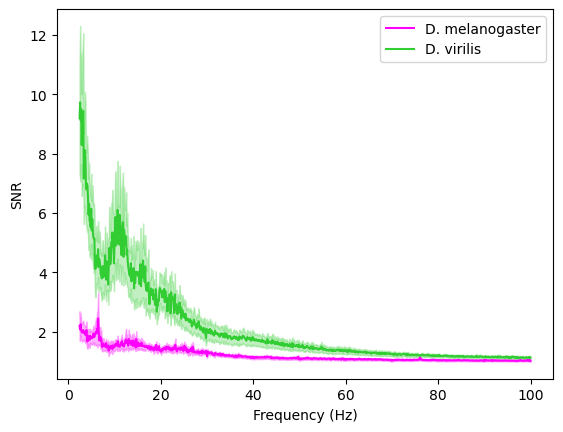

In [29]:
fig = plt.figure()
plt.plot(ff, mean_prey, label = 'D. melanogaster', color='magenta')
plt.fill_between(ff, mean_prey - sem_prey, mean_prey + sem_prey, color='magenta', alpha=0.3)
plt.plot(ff, mean_prey_v, label = 'D. virilis', color='limegreen')
plt.fill_between(ff, mean_prey_v - sem_prey_v, mean_prey_v + sem_prey_v, color='limegreen', alpha=0.3)
plt.ylabel('SNR')
plt.xlabel('Frequency (Hz)')
plt.legend()

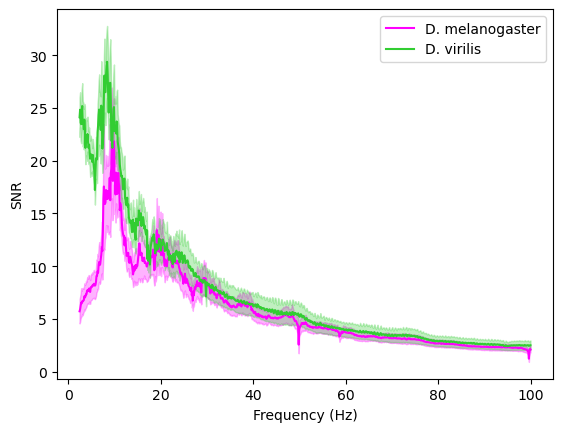

In [30]:
fig = plt.figure()
plt.plot(ff, mean_spider_prey, label = 'D. melanogaster', color='magenta')
plt.fill_between(ff, mean_spider_prey - sem_spider_prey, mean_spider_prey + sem_spider_prey, color='magenta', alpha=0.3)
plt.plot(ff, mean_spider_prey_v, label = 'D. virilis', color='limegreen')
plt.fill_between(ff, mean_spider_prey_v - sem_spider_prey_v, mean_spider_prey_v + sem_spider_prey_v, color='limegreen', alpha=0.3)
plt.ylabel('SNR')
plt.xlabel('Frequency (Hz)')
plt.legend()

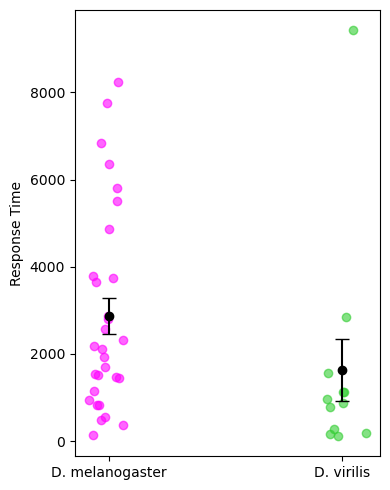

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

# Example LL data for 3, 4, and 5 states (replace with your actual data)


### Side camera frame rate = 100 HZ
rt = np.load(directory+'rt.npy')
rtv = np.load(directory+'rtv.npy')
# Combine into one array
data = [rt, rtv]
labels = ['D. melanogaster', 'D. virilis']

# Scatter plot

fig = plt.figure(figsize=(4, 5))

for i, ll in enumerate(data):
    if i==0:
        x = np.random.normal(i + 0, 0.05, size=len(ll))  # jitter for visibility
        plt.scatter(x, ll, alpha=0.6, label=labels[i], c='magenta')
    elif i==1:
        x = np.random.normal(i + 0, 0.05, size=len(ll))  # jitter for visibility
        plt.scatter(x, ll, alpha=0.6, label=labels[i], c='limegreen')
    mean = np.mean(ll)
    sem = np.std(ll)/np.sqrt(len(ll))
    plt.errorbar(i + 0, mean, yerr=sem, fmt='o', color='black', capsize=5)

# Customize axes
plt.xticks([0,1], labels)
plt.ylabel('Response Time')

plt.tight_layout()
